In [118]:
import numpy as np
import pandas as pd
from task2 import *

In [119]:
%autoreload 2

In [120]:
([2]*3 + [1, 0]*2)*2

[2, 2, 2, 1, 0, 1, 0, 2, 2, 2, 1, 0, 1, 0]

/home/alexkay/MEPHI_03/КонцепцияТПР/program/task2.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  df = pd.DataFrame({'2c': x, 'a//t': y})
/home/alexkay/MEPHI_03/КонцепцияТПР/program/task2.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  df = pd.DataFrame({'2c': x, 'a//t': y})
/home/alexkay/MEPHI_03/КонцепцияТПР/program/task2.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To cont

,index,Regime,defect_type,Название стали,Название СС,Dout,t,T,p,steel_type,Nz,Mx,My,dva_cc
0,0,НУЭ,Кольцевой дефект,Сталь 20,208,0.273,0.016,285,6900000.0,Сталь 20,10000.0,6940.0,-13507.0,0.384558
1,1,НУЭ,Кольцевой дефект,Сталь 20,210,0.273,0.016,285,6900000.0,Сталь 20,12000.0,-4112.0,-6554.0,0.404326
2,2,НУЭ,Кольцевой дефект,Сталь 20,227,0.273,0.016,285,6900000.0,Сталь 20,12000.0,5841.0,-4882.0,0.404680
3,3,МРЗ,Кольцевой дефект,Сталь 20,208,0.273,0.016,285,6900000.0,Сталь 20,13835.0,5973.0,3996.0,0.405356
4,4,МРЗ,Кольцевой дефект,Сталь 20,210,0.273,0.016,285,6900000.0,Сталь 20,18070.0,-8157.0,-728.0,0.401302
5,5,МРЗ,Кольцевой дефект,Сталь 20,227,0.273,0.016,285,6900000.0,Сталь 20,18545.0,1147.0,-4866.0,0.410244
6,6,НУЭ+МРЗ,Кольцевой дефект,Сталь 20,208,0.273,0.016,285,6900000.0,Сталь 20,-3574.0,2289.0,-35.0,0.422998
7,7,НУЭ+МРЗ,Кольцевой дефект,Сталь 20,210,0.273,0.016,285,6900000.0,Сталь 20,-1250.0,12352.0,-19076.0,0.367510
8,8,НУЭ+МРЗ,Кольцевой дефект,Сталь 20,227,0.273,0.016,285,6900000.0,Сталь 20,-5130.0,-4253.0,3189.0,0.413381
9,9,НУЭ,Кольцевой дефект,Сталь 20,32,0.325,0.019,285,6900000.0,Сталь 20,10000.0,6940.0,-13507.0,0.478558


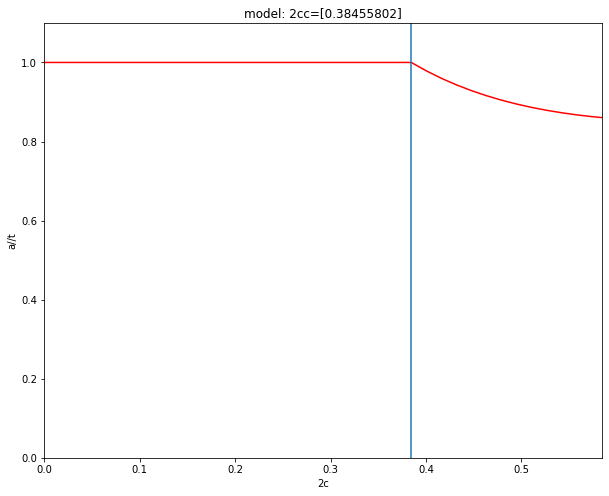

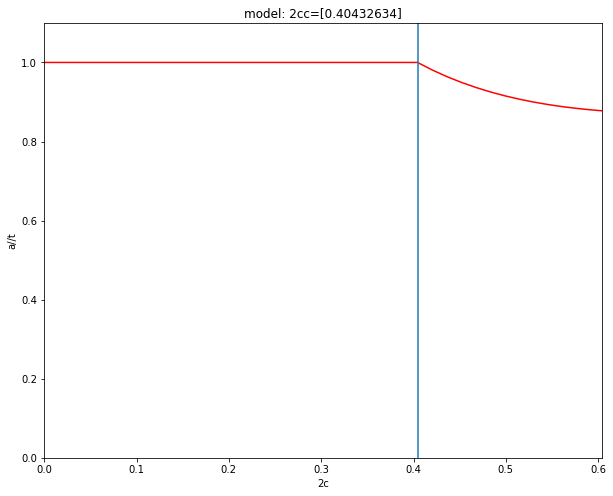

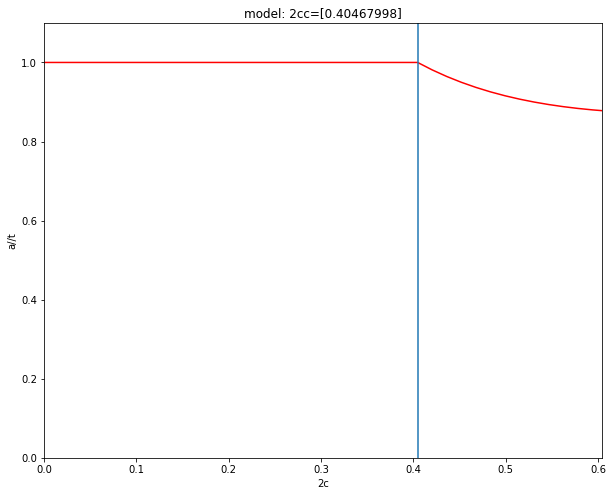

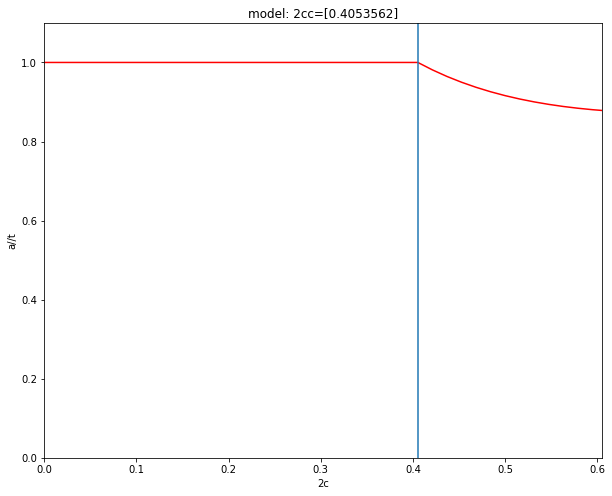

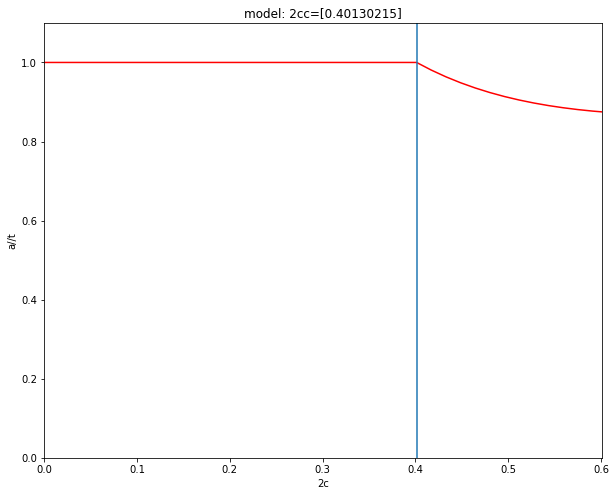

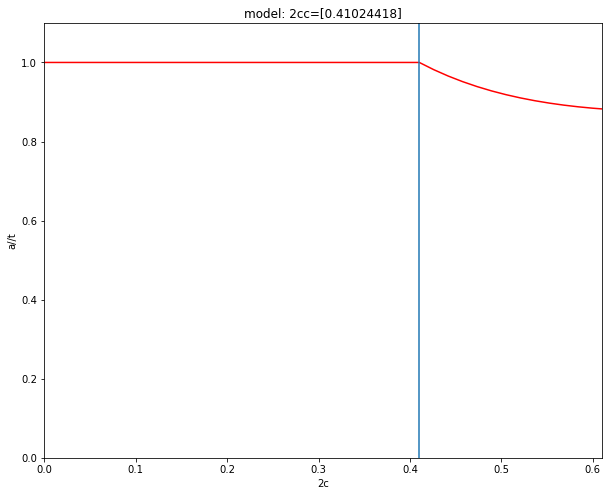

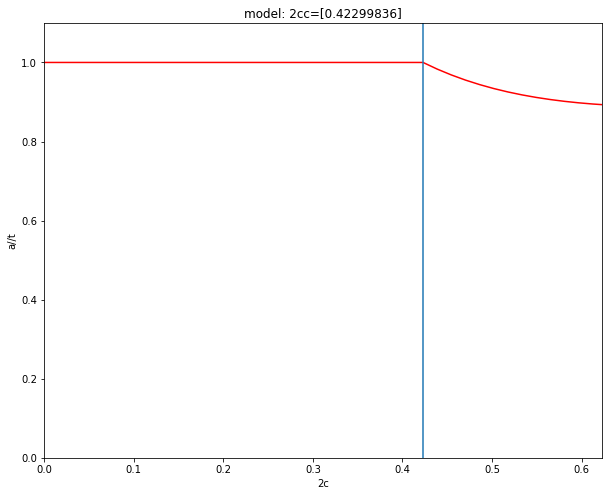

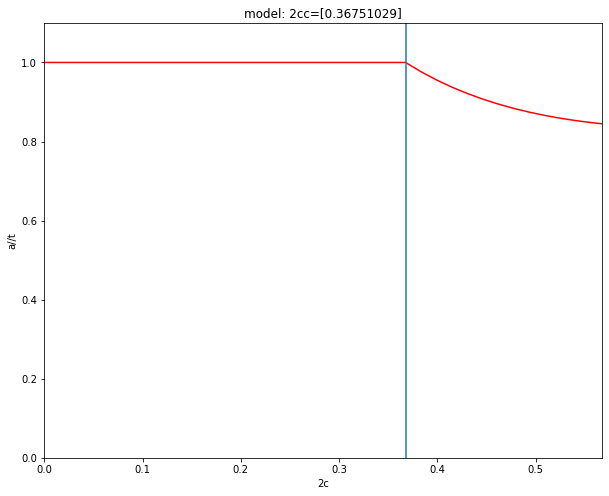

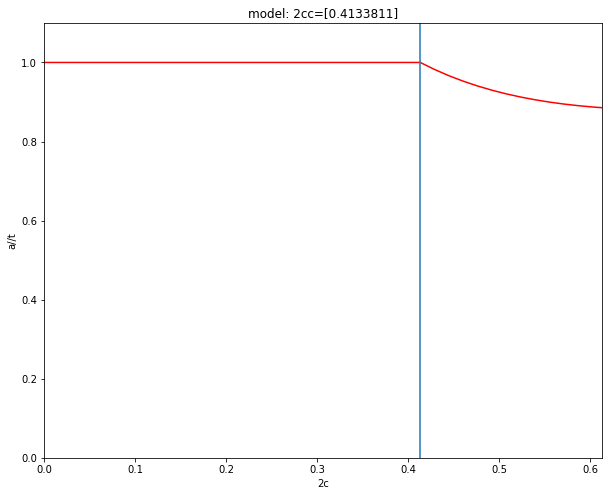

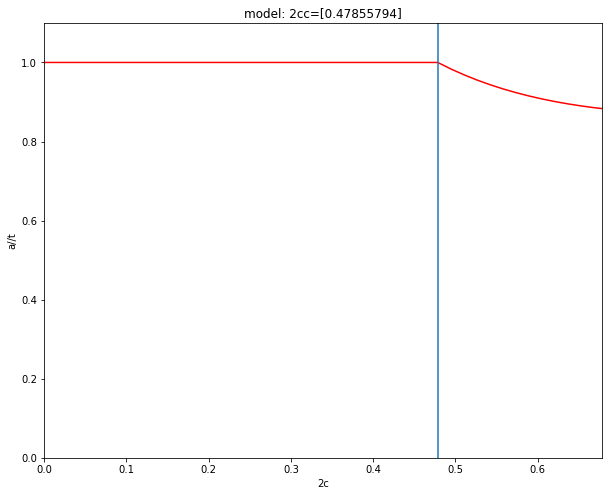

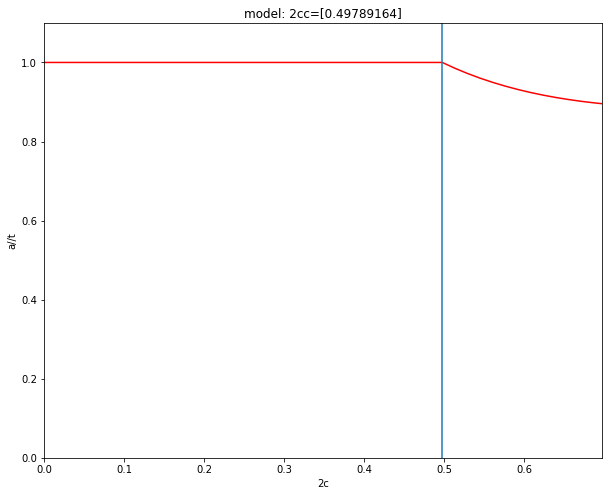

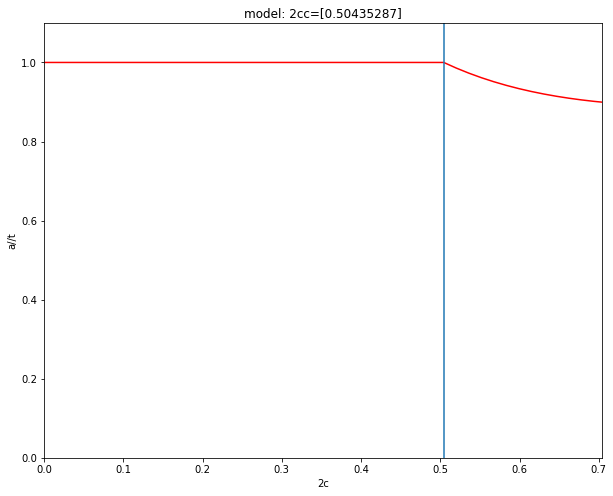

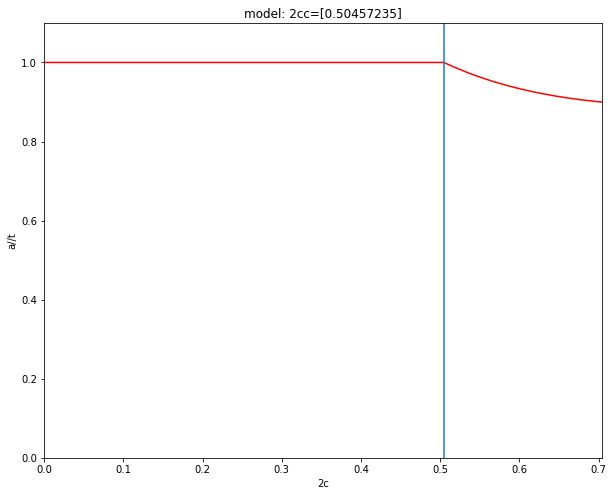

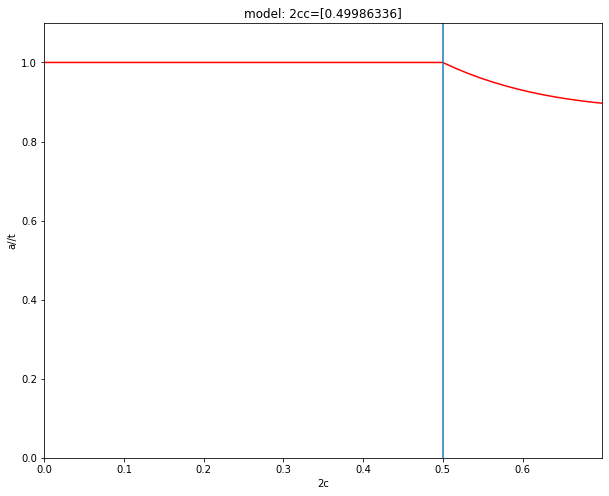

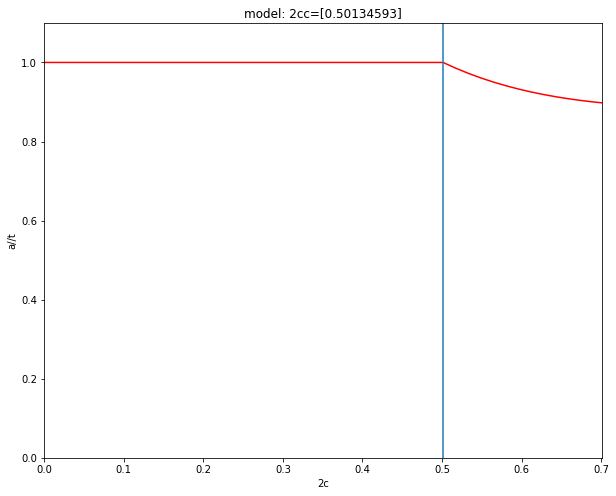

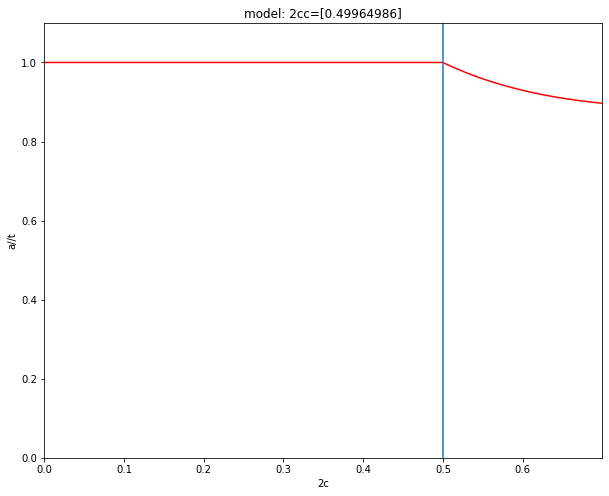

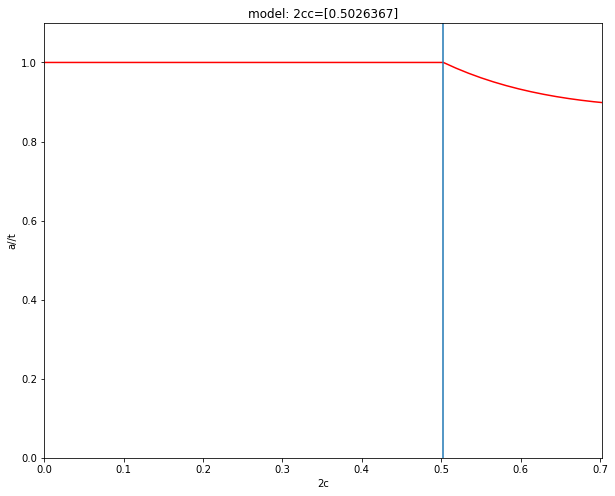

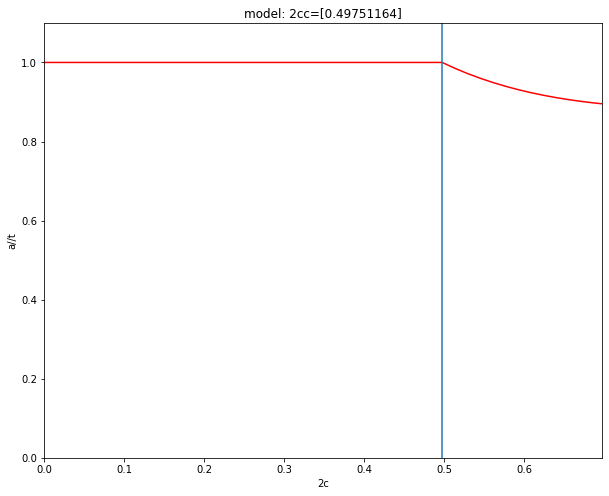

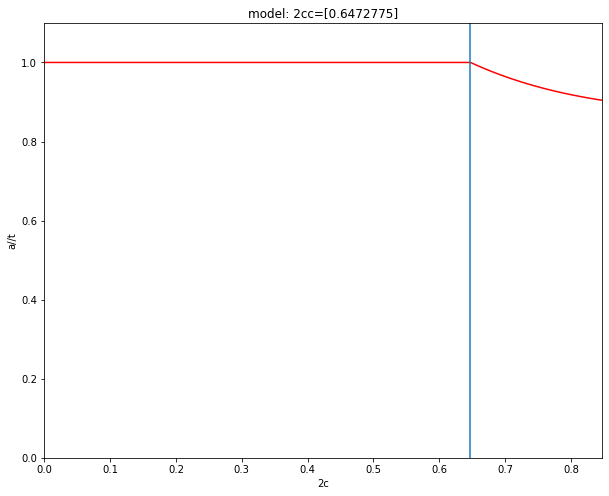

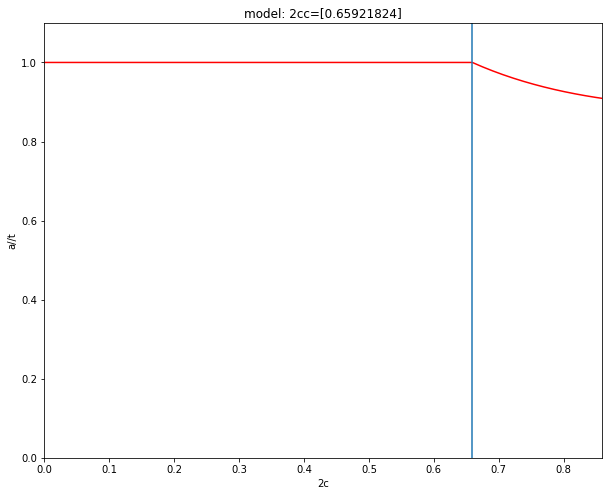

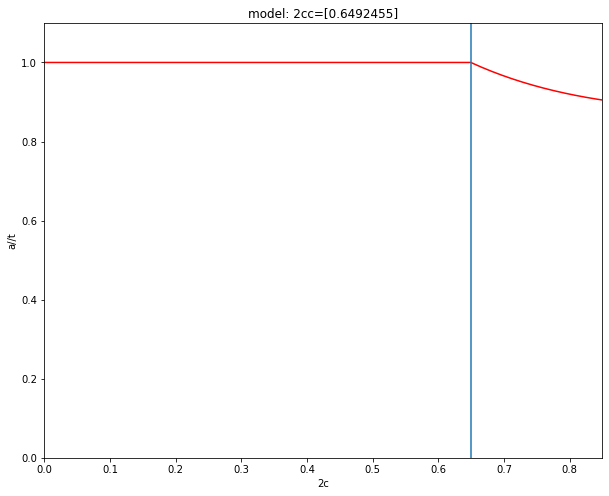

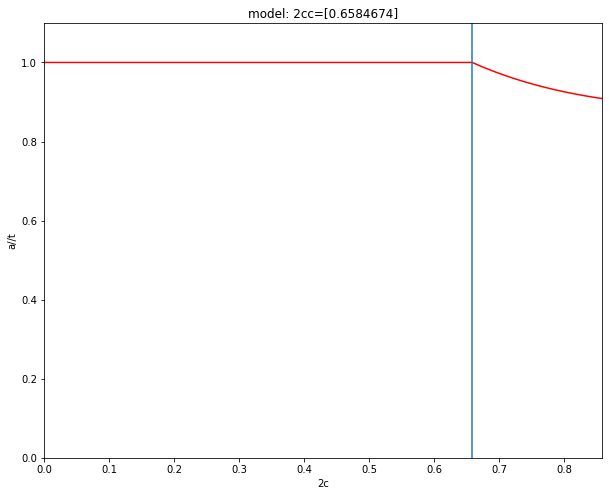

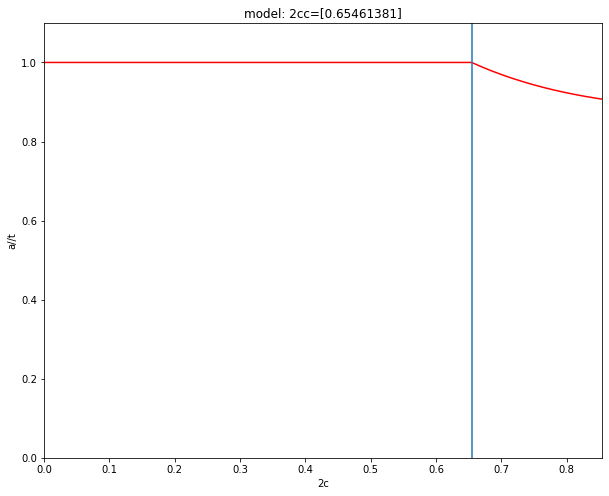

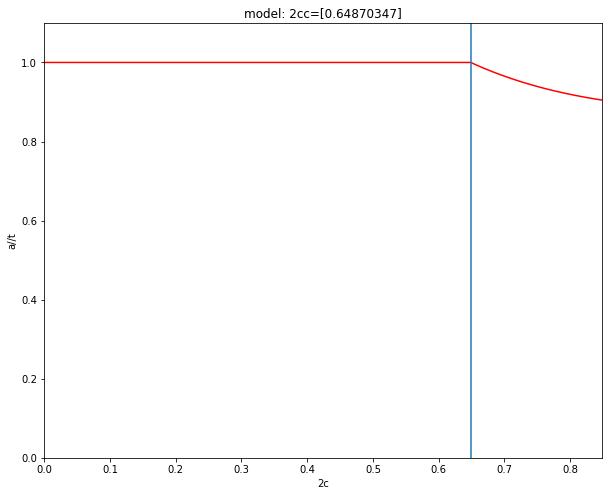

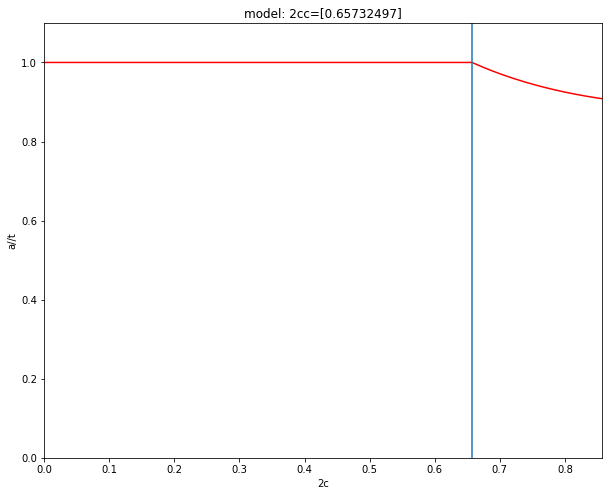

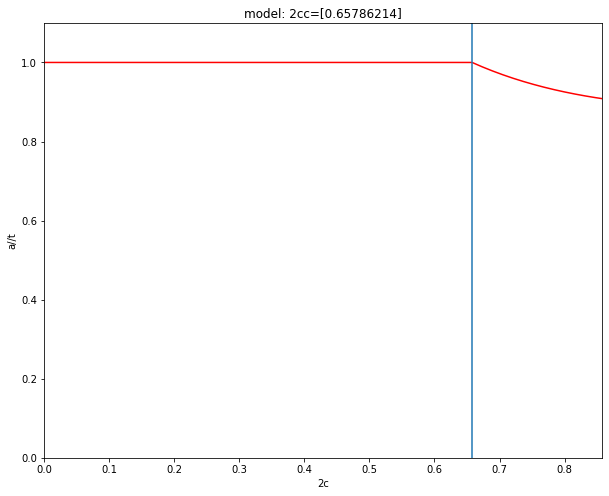

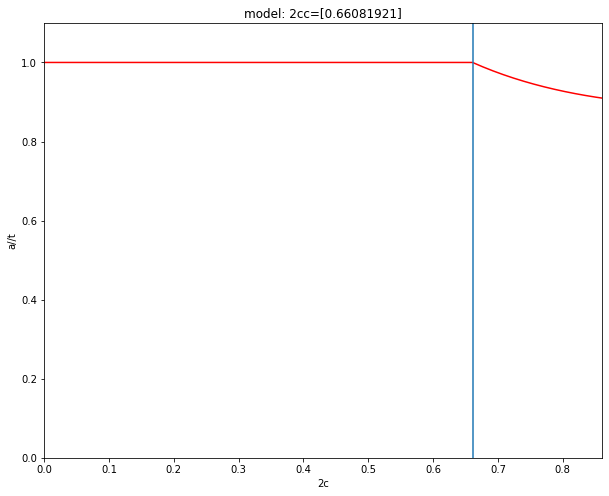

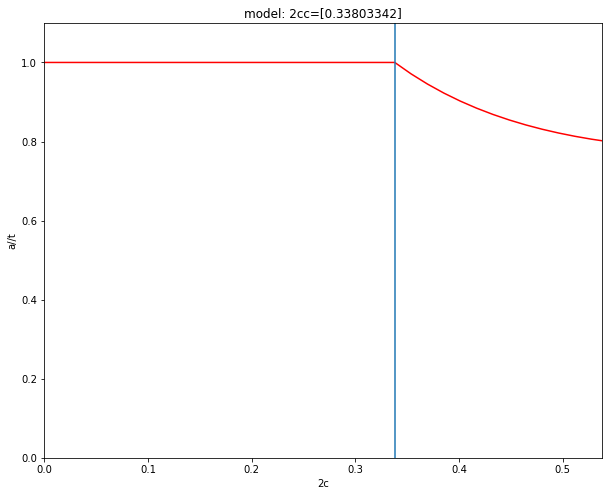

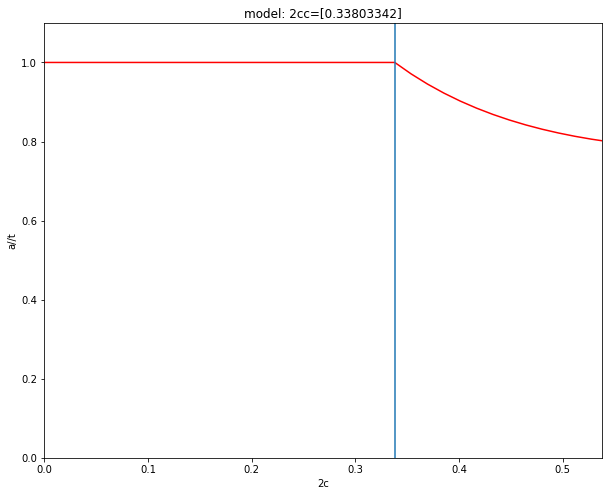

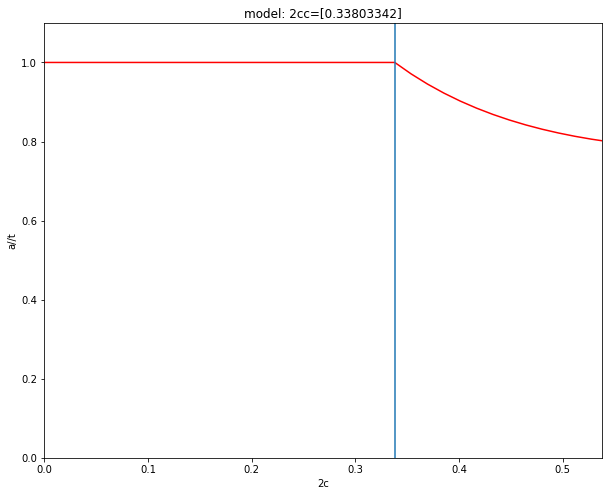

In [148]:
regime = ['НУЭ']*3 + ['МРЗ']*3 + ['НУЭ+МРЗ']*3; regime *= 3; regime += ['НУЭ', 'МРЗ', 'НУЭ+МРЗ']
deffect_type = ['Кольцевой дефект'] * 9; deffect_type *= 3; deffect_type += ['Продольный дефект']*3
deffect_name = ['208', '210', '227']*3 + ['32', '6', '445']*3 + ['311a', '311b', '349a']*3 + ['273', '325', '426']
Dout = np.array([273]*9 + [325]*9 + [426]*9 + [273]*3)*1e-3
t = np.array([16]*9 + [19]*9 + [24]*9 + [16]*3)*1e-3
T = np.array([285]*9 + [285]*9 + [285]*9 + [285]*3)
p = np.array([6.9]*9 + [6.9]*9 + [6.9]*9 + [6.9]*3)*1e6
Steel = ['Сталь 20']*9 + ['Сталь 20']*9 + (['Cталь 16ГС'] + ['Сталь 20']*2)*3 + ['Сталь 20']*3

Nz_nue = [10, 12, 12] + [13.835, 18.07, 18.545] + [-3.574, -1.25, -5.13] + [10]
Mx_nue = [6.94, -4.112, 5.841] + [5.973, -8.157, 1.147] + [2.289, 12.352, -4.253] + [6.94]
My_nue = [-13.507, -6.554, -4.882] + [3.996, -0.728, -4.866] + [-0.035, -19.076, 3.189] + [-13.507]

Nz_mrz = [3.7, 6.6, 3.9] + [3.6, 2, 1.1] + [6.2, 4.5, 4.3] + [3.7]
Mx_mrz = [3.19, 2.34, 2.04] + [3.09, 3.67, 3.85] + [1.95, 3.35, 14.79] + [3.19]
My_mrz = [5.74, 2.2, 2.78] + [4.74, 3.64, 4.69] + [3.55, 5.74, 5.75] + [5.74]

Nz_nue_mrz = np.array(Nz_nue) + np.array(Nz_mrz)
Mx_nue_mrz = np.array(Mx_nue) + np.array(Mx_mrz)
My_nue_mrz = np.array(My_nue) + np.array(My_mrz)


#print(len(regime), len(deffect_type), len(Dout), len(Steel))

task2_table = pd.DataFrame({
    'Regime': regime, 
    'defect_type': deffect_type,
    'Название стали': Steel,
    'Название СС': deffect_name,
    'Dout': Dout,
    't': t,
    'T': T,
    'p': p,
    'steel_type': Steel, 
    'Nz': np.array(Nz_nue + Nz_mrz + Nz_nue_mrz.tolist()) * 1e3,
    'Mx': np.array(Mx_nue + Mx_mrz + Mx_nue_mrz.tolist()) * 1e3,
    'My': np.array(My_nue + My_mrz + My_nue_mrz.tolist()) * 1e3
}).reset_index()

task2_table['dva_cc'] = task2_table.apply(lambda x: main(**x[['Dout', 't', 'T', 'p', 'steel_type', 'Nz', 'Mx', 'My', 'defect_type', 'index']].to_dict())[0], axis=1)

# task2_table.groupby(['Режим','Название СС']).first()
task2_table.to_csv('task2_table_data.csv')
task2_table